### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Maharashtra.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,19391643,9802129,9589514
1,1911,21474523,10922671,10551852
2,1921,20849666,10692865,10156801
3,1931,23959300,12305958,11653342
4,1941,26832758,13769460,13063298


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

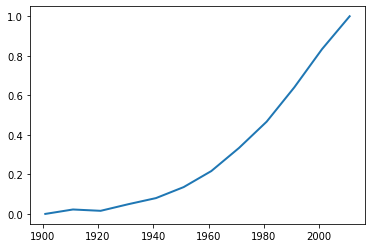

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9872619704827622

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.2594751012381096,
 1.5292481906123214,
 1.8306478742848924,
 2.1650352372086274]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.259475
13,2031,1.529248
14,2041,1.830648
15,2051,2.165035


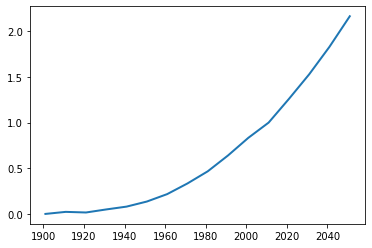

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


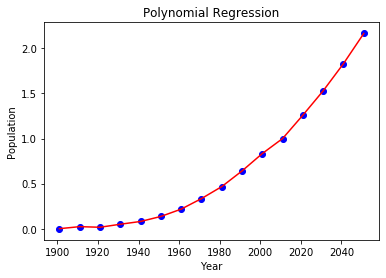

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[19391643.0,
 21474523.0,
 20849666.0,
 23959300.0,
 26832758.0,
 32002564.0,
 39553718.0,
 50412235.0,
 62782818.0,
 78937187.0,
 96878627.0,
 112374333.0,
 136501026.0,
 161585253.0,
 189610207.0,
 220702443.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,19391643.0
1,1911,21474523.0
2,1921,20849666.0
3,1931,23959300.0
4,1941,26832758.0
5,1951,32002564.0
6,1961,39553718.0
7,1971,50412235.0
8,1981,62782818.0
9,1991,78937187.0


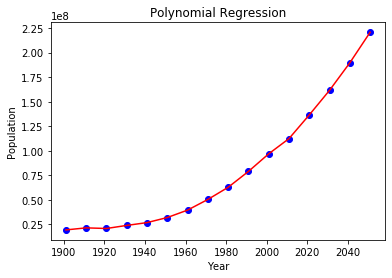

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.023132
2,1921,0.018388
3,1931,0.051688
4,1941,0.081900
5,1951,0.138063
6,1961,0.219376
7,1971,0.336786
8,1981,0.466802
9,1991,0.640440


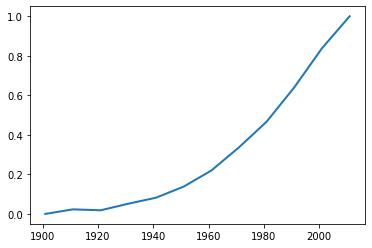

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9993153598278937

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.261131277037208, 1.5314624319445613, 1.8337882693296308, 2.1695383893333258]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.023132
2,1921,0.018388
3,1931,0.051688
4,1941,0.081900
5,1951,0.138063
6,1961,0.219376
7,1971,0.336786
8,1981,0.466802
9,1991,0.640440


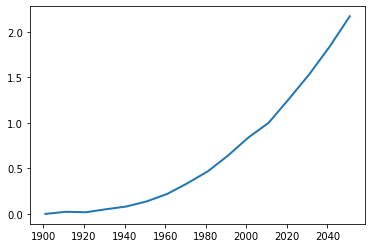

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

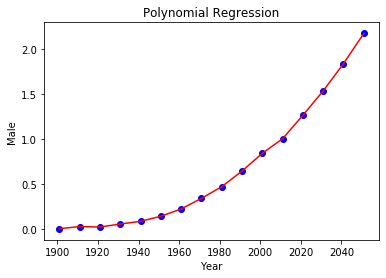

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[9802129.0,
 10922671.0,
 10692865.0,
 12305958.0,
 13769460.0,
 16490039.0,
 20428882.0,
 26116351.0,
 32414432.0,
 40825618.0,
 50400596.0,
 58243056.0,
 70892497.0,
 83987589.0,
 98632533.0,
 114896580.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,9802129.0
1,1911,10922671.0
2,1921,10692865.0
3,1931,12305958.0
4,1941,13769460.0
5,1951,16490039.0
6,1961,20428882.0
7,1971,26116351.0
8,1981,32414432.0
9,1991,40825618.0


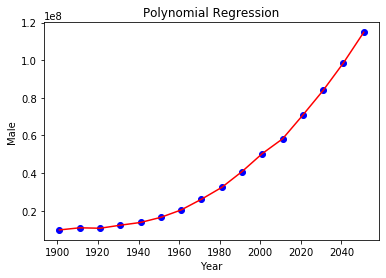

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.000000
1,1911,0.021605
2,1921,0.012736
3,1931,0.046335
4,1941,0.077989


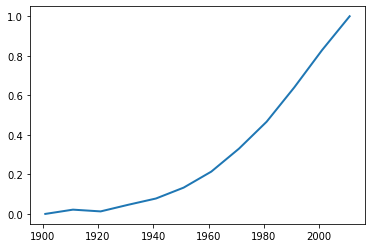

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9980547129318735

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.2576739446861325,
 1.5268401157542826,
 1.8272325706852257,
 2.1601378814563645]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.257674
13,2031,1.526840
14,2041,1.827233
15,2051,2.160138


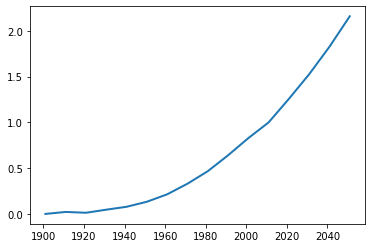

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

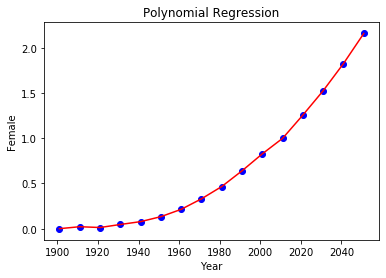

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[9589514.0,
 10551852.0,
 10156801.0,
 11653342.0,
 13063298.0,
 15512525.0,
 19124836.0,
 24295884.0,
 30368386.0,
 38111569.0,
 46478031.0,
 54131277.0,
 65608529.0,
 77597665.0,
 90977674.0,
 105805864.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,9589514.0
1,1911,10551852.0
2,1921,10156801.0
3,1931,11653342.0
4,1941,13063298.0
5,1951,15512525.0
6,1961,19124836.0
7,1971,24295884.0
8,1981,30368386.0
9,1991,38111569.0


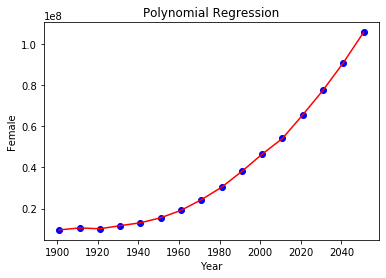

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,19391643.0,1901,9802129.0,1901,9589514.0
1,1911,21474523.0,1911,10922671.0,1911,10551852.0
2,1921,20849666.0,1921,10692865.0,1921,10156801.0
3,1931,23959300.0,1931,12305958.0,1931,11653342.0
4,1941,26832758.0,1941,13769460.0,1941,13063298.0
5,1951,32002564.0,1951,16490039.0,1951,15512525.0
6,1961,39553718.0,1961,20428882.0,1961,19124836.0
7,1971,50412235.0,1971,26116351.0,1971,24295884.0
8,1981,62782818.0,1981,32414432.0,1981,30368386.0
9,1991,78937187.0,1991,40825618.0,1991,38111569.0
